# Part I - (Ford GoBike System Dataset Exploration)
## by (Nimanshi Rustagi)

## Introduction

The dataset I am using in this project is the Ford GoBike System Dataset which is provided by Udacity and represents trips taken by members of the service for month of February of 2019. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling

In [1]:
# importing all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
                                            
%matplotlib inline

> Now, lets load our dataset.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

Now, let's peform some operations to know the properties of our dataset.

In [3]:
# shape of our dataset
df.shape

(183412, 16)

In [4]:
# list of columns in our dataset
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
# First few rows of our dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# descriptive statistics of our dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

My dataset contains information about Ford GoBike trips and consists of 183,412 rows with 16 columns. The columns include attributes such as duration, start and end times, station details (IDs, names, latitude, longitude), bike ID, user information (type, birth year, gender), and bike share status.

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in our dataset is the duration of bike rides. If we understand the factors influencing ride duration, it would help us understand bike usage patterns and user behavior.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features which can support our investigation of ride duration are:

1. Start and End Times: Analysis of start and end times can reveal patterns in ride duration based on different times of the day, days of the week, or months of the year.
2. Start and End Station Details: Information about the starting and ending stations, such as station IDs, names, and geographic coordinates, can help us identify factors such as distance traveled and station popularity, which may influence ride duration.
3. User Information: User-related features such as user type (subscriber or customer), member birth year, and member gender can provide us insights into the demographic characteristics of riders and their potential impact on ride duration.
4. Bike Share Status: The bike share status column indicates whether the bike was shared for the entire trip. Analyzing this feature can help understand how bike sharing affects ride duration and user behavior.

By examining these features in relation to ride duration, we can gain a comprehensive understanding of the factors influencing bike ride lengths in the Ford GoBike system.

Before going forward with our exploration goals, lets clean our dataset first.

In [8]:
# finding null values
null_values = df.isna().sum()
null_values

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# dropping rows with missing station information
df.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'], inplace=True)

In [10]:
# filling in missing values in 'member_birth_year' and 'member_gender' column
# with the median and  mode value of that columns respectively.
df['member_birth_year'].fillna(df['member_birth_year'].median(), inplace=True)
df['member_gender'].fillna(df['member_gender'].mode()[0], inplace=True)

In [11]:
# Converting data types
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [12]:
# Let's see if the changes are done
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

Now, our dataset is clean and has no null values.

####  Let's investigate outliers too

In [13]:
# Defining a function for outliers
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    return outliers, lower_bound, upper_bound

In [14]:
duration_outliers, duration_lower_bound, duration_upper_bound = detect_outliers_iqr(df['duration_sec'])

In [15]:
birth_year_outliers, birth_year_lower_bound, birth_year_upper_bound = detect_outliers_iqr(df['member_birth_year'])

In [16]:
# Outliers count and its lower and upper bound for duration_sec column
(duration_outliers.count(), duration_lower_bound, duration_upper_bound)

(10098, -381.5, 1502.5)

In [17]:
# Outliers count and its lower and upper bound for member_birth_year column
(birth_year_outliers.count(), birth_year_lower_bound, birth_year_upper_bound)

(9076, 1964.5, 2008.5)

From above, we can see that there are 10,098 outliers with the lower bound at -381.5 seconds and the upper bound at 1,502.5 seconds for duration_sec and for member_birth_year, there are 9,076 outliers with the lower bound at 1964.5 and the upper bound at 2008.5. 

In case of duration_sec, since negative durations are not possible and and the dataset may include erroneously long rides so we are removing outliers in the duration_sec column. For the member_birth_year, it's plausible to have riders born before 1964.5, and those data points could be valid, however, those born after 2008.5 doesn't seem valid as this data was collected in Feb 2019 and those users would be younger then 9 which doesn't seems possible. Therefore, I am also removing data for those born after 2008.5.

In [18]:
# Removing outliers in duration_sec column
df1 = df[(df['duration_sec'] >= duration_lower_bound) & (df['duration_sec'] <= duration_upper_bound)]

# Removing outliers in member_birth_year column
df1 = df1[(df1['member_birth_year'] <= birth_year_upper_bound)]


df1 is our cleaned dataframe having no outliers and only genuine data points.

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173117 entries, 6 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173117 non-null  int64         
 1   start_time               173117 non-null  datetime64[ns]
 2   end_time                 173117 non-null  datetime64[ns]
 3   start_station_id         173117 non-null  float64       
 4   start_station_name       173117 non-null  object        
 5   start_station_latitude   173117 non-null  float64       
 6   start_station_longitude  173117 non-null  float64       
 7   end_station_id           173117 non-null  float64       
 8   end_station_name         173117 non-null  object        
 9   end_station_latitude     173117 non-null  float64       
 10  end_station_longitude    173117 non-null  float64       
 11  bike_id                  173117 non-null  int64         
 12  user_type       

## Univariate Exploration

Before starting with the univariate explorations of our main feature and other features influencing it. Lets define some functions which would help us in simplifying our work and reduce repetive code.

In [20]:
# function defined for plotting histogram

def plot_histogram(data, column, bins=20, log_scale=False):
    plt.figure(figsize=[8, 5])
    if log_scale:
        plt.hist(data=data, x=column, bins=10 ** np.arange(2.4, np.log10(data[column].max()) + 0.025, 0.025))
        plt.xscale('log')
        plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
    else:
        plt.hist(data=data, x=column, bins=bins)
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Frequency')
    scale_type = 'Log' if log_scale else 'Standard'
    plt.title(f'Distribution of {column.replace("_", " ").title()} ({scale_type} Scale)')
    plt.show()

    
# Function defined for plotting countplot

def plot_countplot(data, column, palette=None, rotation=0):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=data, x=column, palette=palette)
    plt.title(f'Distribution of {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Count')
    if rotation:
        plt.xticks(rotation=rotation)
    plt.show()

#### Exploration and visualization of our main variable of interest, which is the duration of bike rides:

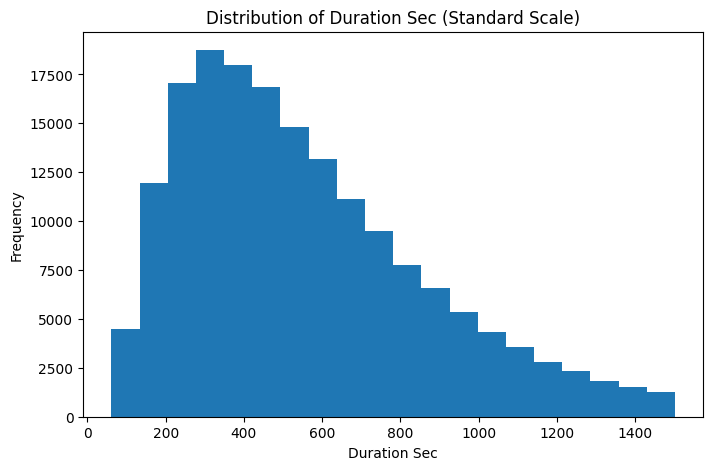

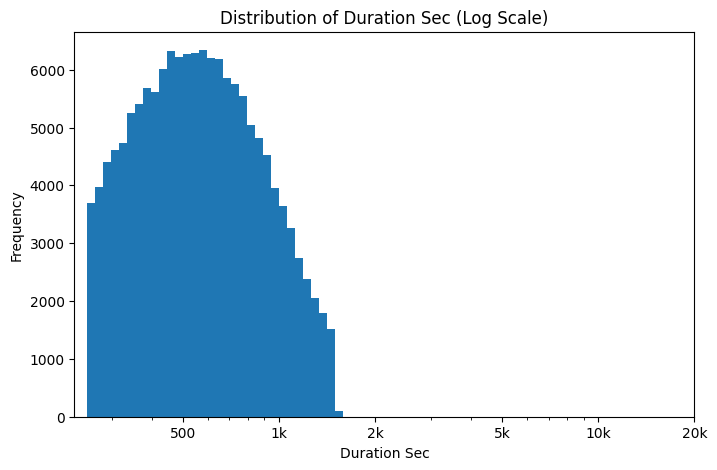

In [21]:
# Standard-scaled histogram of ride durations
plot_histogram(df1, 'duration_sec')

# Log-scaled histogram of ride durations
plot_histogram(df1, 'duration_sec', log_scale=True)

The distribution of ride durations shows that most rides are short, with a peak in frequency at the lower end of the duration scale. This indicates that short, quick rides are the most common usage of the bike-sharing system.


Now, lets look at distribution of our user type.

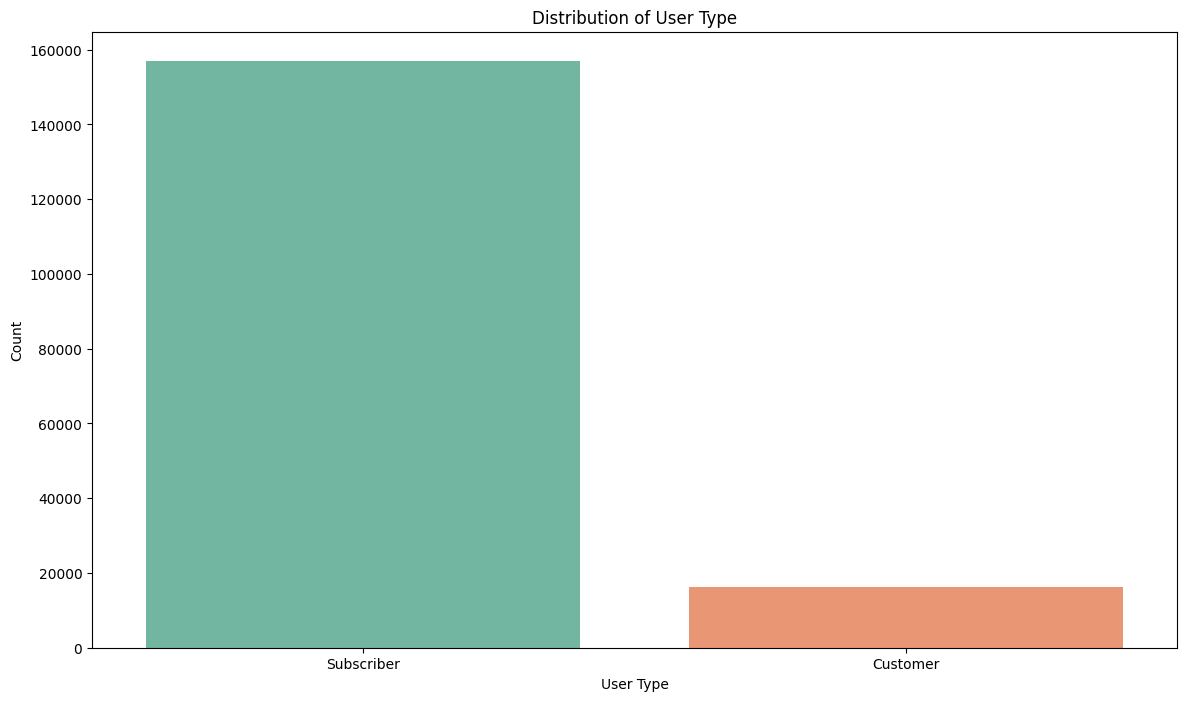

In [22]:
# Lets create a count plot to visualize the count of each user type
plot_countplot(df1, 'user_type', palette='Set2')


The count plot shows that the majority of users are subscribers. It also shows us that there is a significant difference in the count of subscribers compared to customers.


Next,lets look at our other variables which influence our main feature of interest. 

Lets see the distribution of start and end times to understand patterns in ride duration based on different times of the day, days of the week, or months of the year.

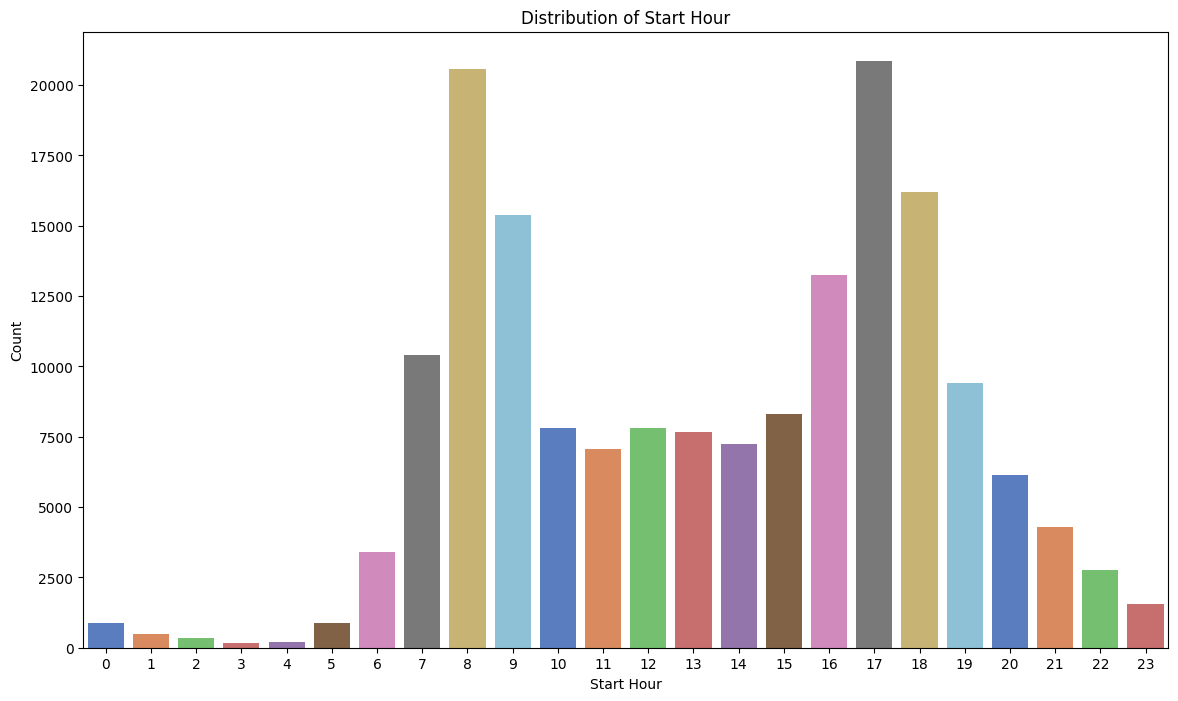

In [23]:
# Extracting hour from start_time
df1['start_hour'] = pd.to_datetime(df1['start_time']).dt.hour

# Create a count plot to visualize the distribution of start times (hourly)
plot_countplot(df1, 'start_hour', palette='muted')

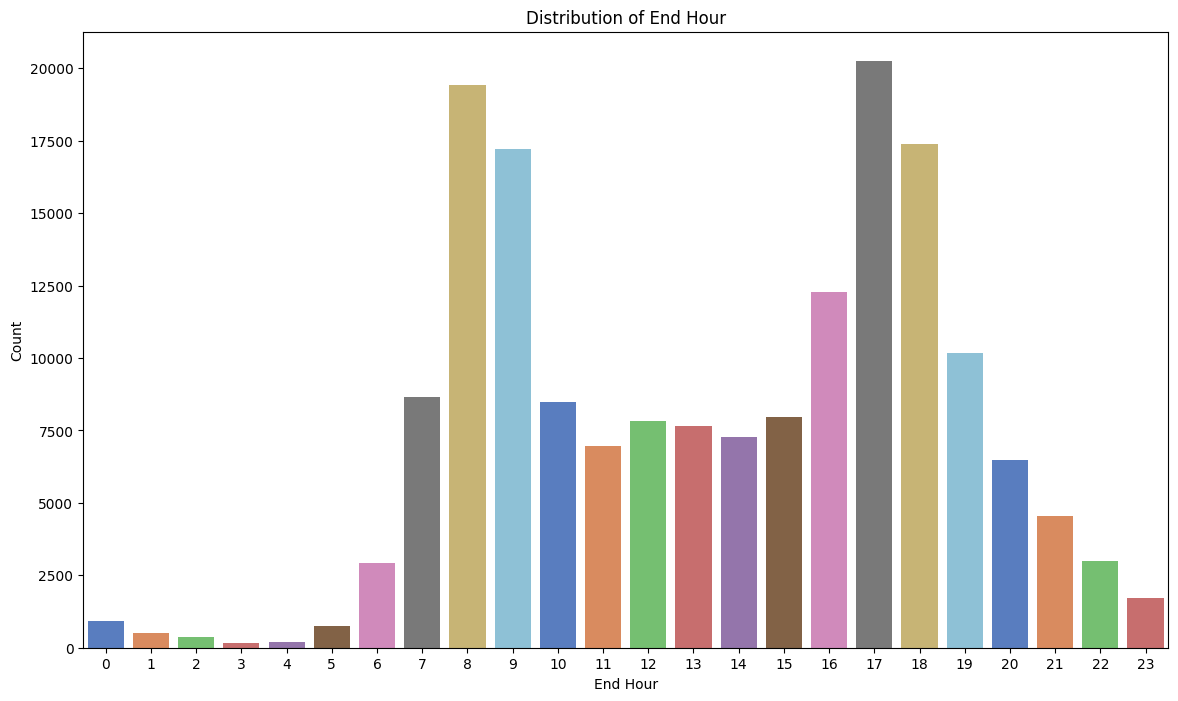

In [24]:
# Extracting hour from end_time
df1['end_hour'] = pd.to_datetime(df1['end_time']).dt.hour

# Create a count plot to visualize the distribution of end times (hourly)
plot_countplot(df1, 'end_hour', palette='muted')

These countplot shows the distribution of start times (hourly) and helps in understanding the peak hours of bike rides. These shows that 17:00 hours and 08:00 hours are the peak hours when most no. of people start and end their ride.

Lets analyse information about start and end stations such as station names now which can provide insights into factor like station popularity.

In [25]:
# Due to the number of different stations, we will use the top 10 most common start stations for the next histogram
top_start_stations = df1['start_station_name'].value_counts().head(10).index
print("Top_10_start_stations:",top_start_stations)

top_end_stations = df1['end_station_name'].value_counts().head(10).index
print("Top_10_end_stations:",top_end_stations)


Top_10_start_stations: Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Howard St at Beale St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)'],
      dtype='object')
Top_10_end_stations: Index(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 4th St)', 'Berry St at 4th St',
       'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)',
       'The Embar

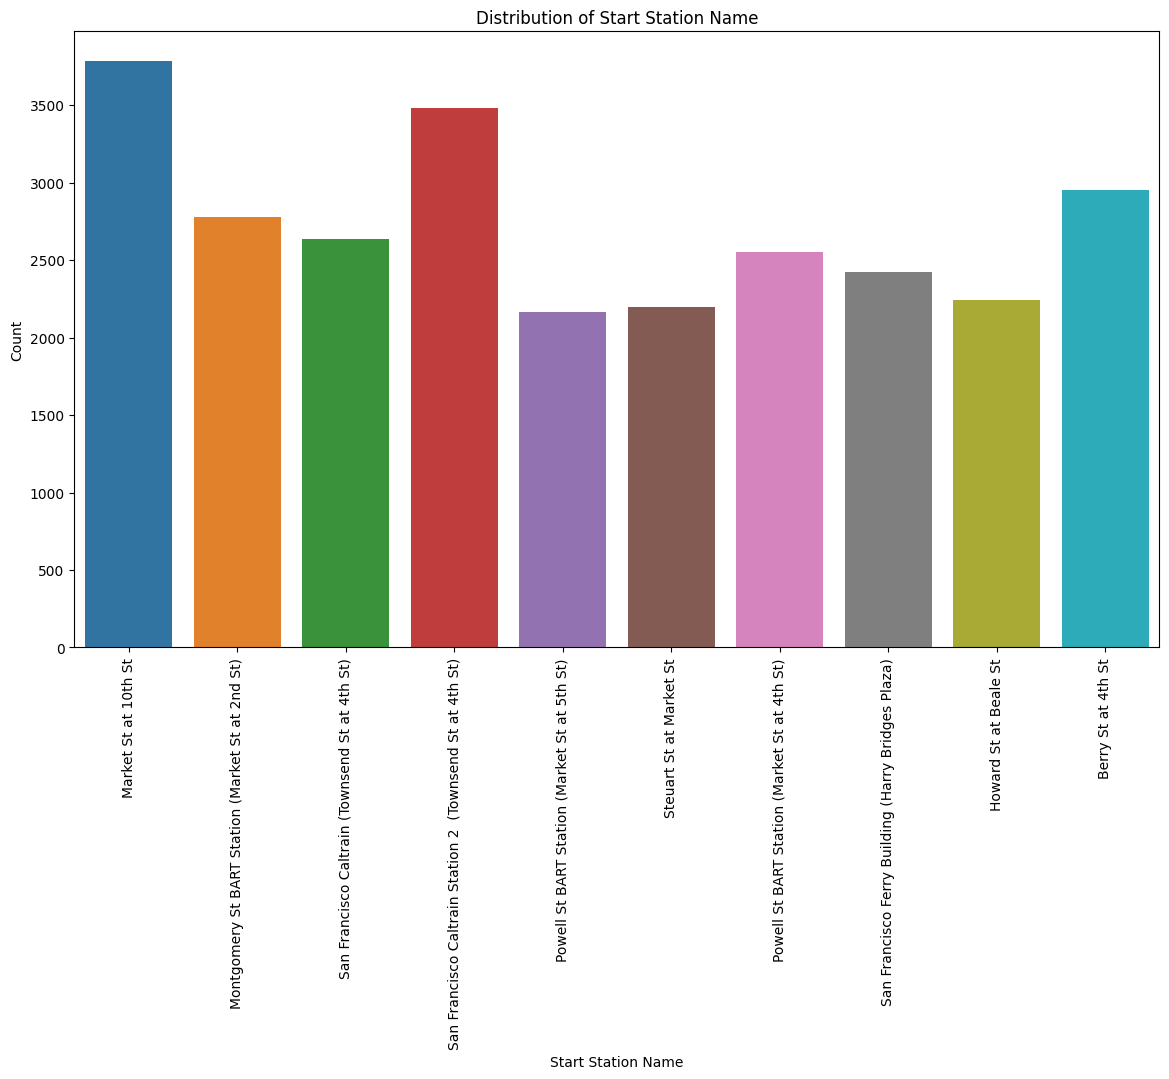

In [26]:
# Countplot showing the distribution of start station names (top 10)
plot_countplot(df1[df1['start_station_name'].isin(top_start_stations)], 'start_station_name',rotation=90,)

It helps in identifying popular start stations.

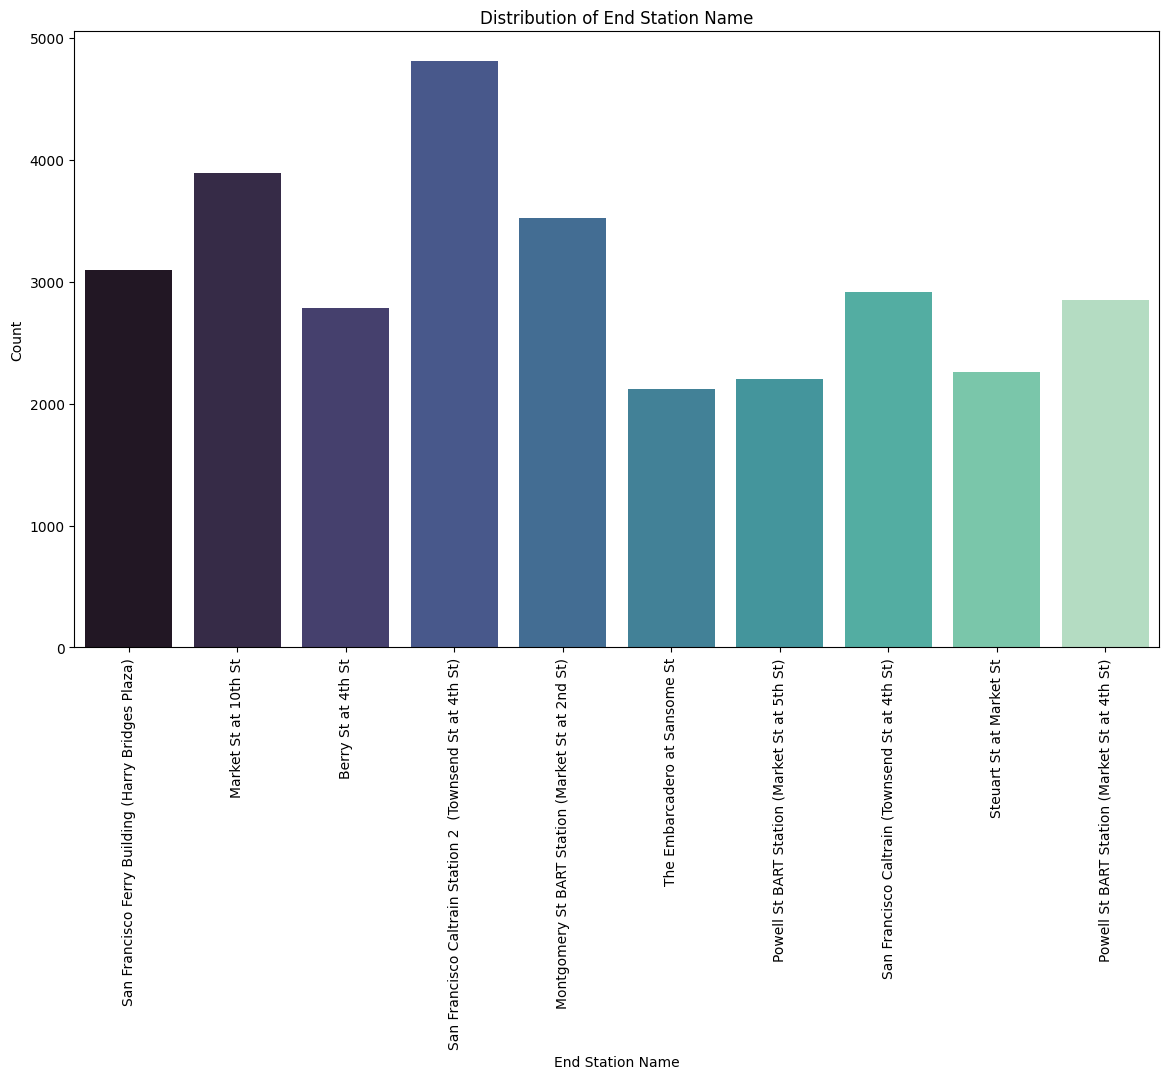

In [27]:
# Analysis of End Station names (top 10)
#The countplot showing the distribution of end station IDs(top 10).
plot_countplot(df1[df1['end_station_name'].isin(top_end_stations)], 'end_station_name', palette='mako', rotation=90)

This countplot shows the distribution of end station names and helps in identifying popular end stations.

From above countplots, we can see that 'Market St at 10th St' is the most popular start station and 'San Francisco Caltrain Station 2  (Townsend St at 4th St)' is the most popular end station.

Now, lets explore user-related features such as user type (subscriber or customer), member birth year, and member gender can provide insights into the demographic characteristics of riders.


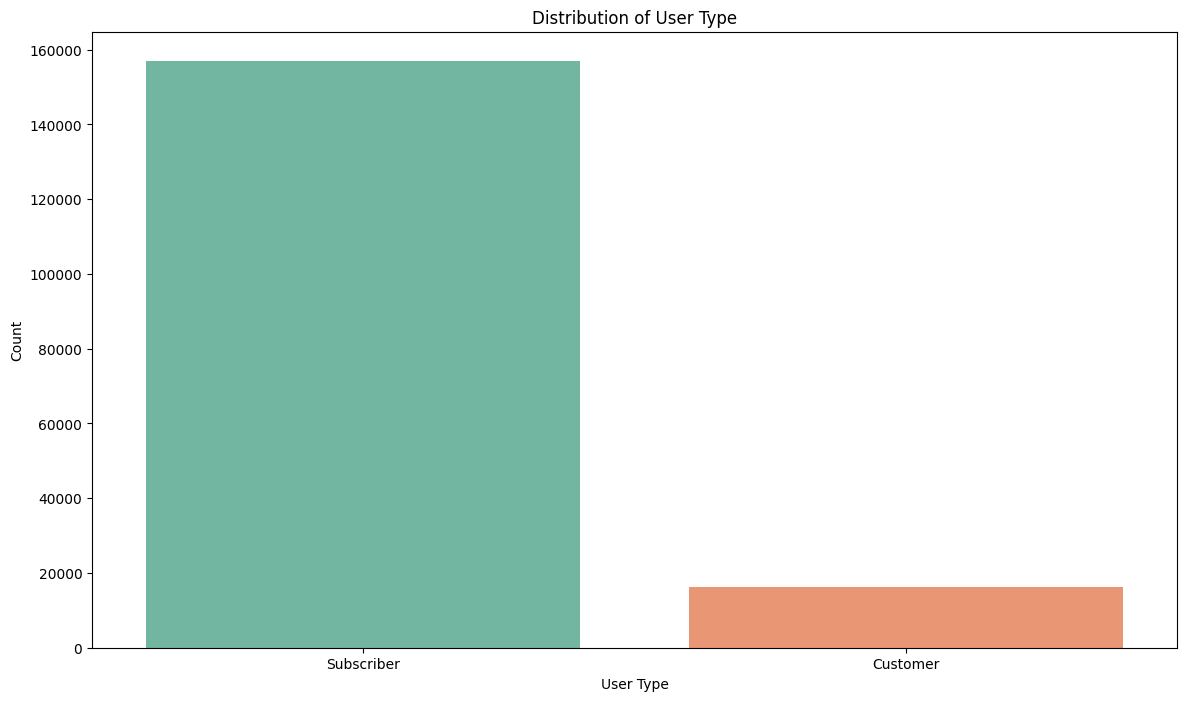

In [28]:
#Analysis of User Type:
plot_countplot(df1, 'user_type', palette='Set2')

The countplot shows the distribution of user types (subscriber or customer) and helps in understanding the proportion of subscribers and customers using the bike-sharing service. From this plot, we can see that the no. of customer using the bike sharing company is approxiamately 8 times less than the no of subscriber.

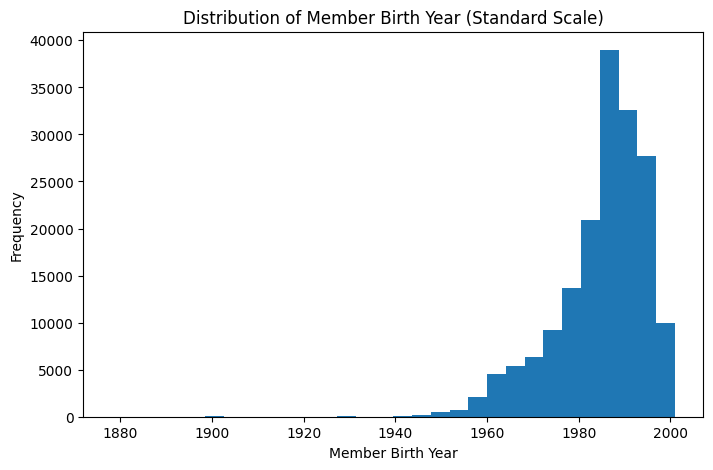

In [29]:
# Analysis of Member Birth Year:
plot_histogram(df1, 'member_birth_year', bins=30, log_scale=False)

The histogram shows the distribution of member birth years and helps in understanding the age distribution of users. This shows that the most of the users of the bike sharing company are born between 1980 to 2000.

Analysis of Member Gender:

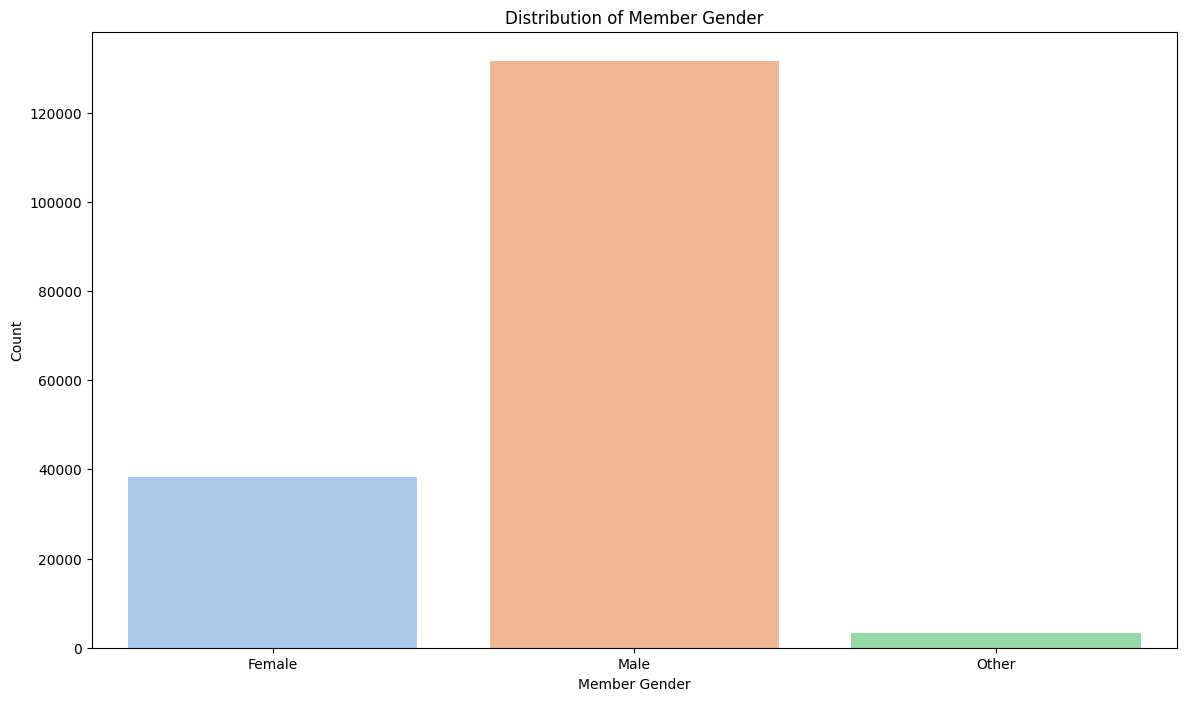

In [30]:
# Create a count plot to visualize the distribution of member gender
plot_countplot(df1, 'member_gender', palette='pastel')

The countplot shows the distribution of member genders and helps in understanding the gender distribution of users. From the plot, we can see that males use the bike sharing service more than female and other genders. 

Bike Share Status:
Analyzing the bike share status column can help understand how bike sharing affects ride duration and user behavior.

Analysis of Bike Share Status:

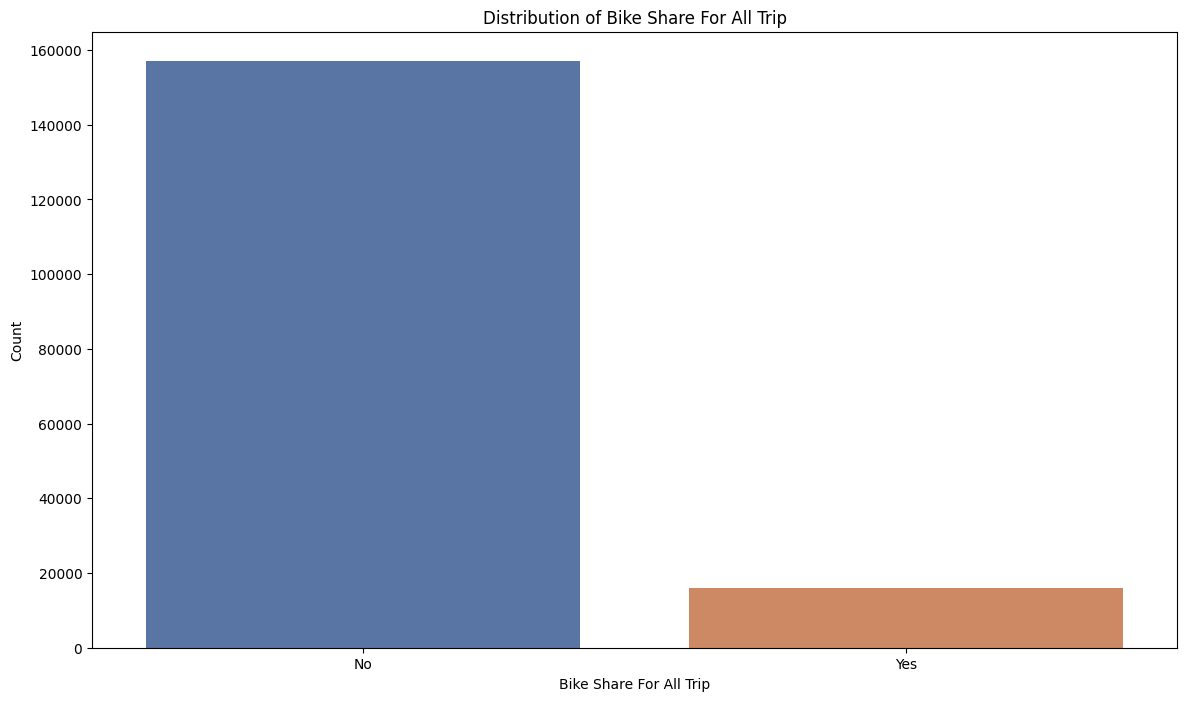

In [31]:
plot_countplot(df1, 'bike_share_for_all_trip', palette='deep')

The countplot shows the distribution of bike share status (whether the bike was shared for the entire trip) and helps in understanding the frequency of bike sharing among users. From the plot, we can see that most of users don't share bike for he trip.

Univariate exploration of the mentioned features provides insights into various aspects of the dataset, including the distribution of start and end times, station details, user information, and bike share status.
These visualizations help in understanding patterns and characteristics of bike rides and users in the dataset.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In the exploration of various features, including start and end times, start and end station details, user information, and bike share status, several insights were gained regarding their distributions and characteristics.

Ride duration: Our analysis of the distribution of ride durations shows that most rides are short, with a peak in frequency at the lower end of the duration scale. This indicates that short, quick rides are the most common usage of the bike-sharing systems.

Start and End Times:The analysis of start and end times revealed that 17:00 hours and 08:00 hours is the time when most no. of people start and end their ride.

Start and End Station Details: From our graph for station names,  we can see that 'Market St at 10th St' is the most popular start station and 'San Francisco Caltrain Station 2 (Townsend St at 4th St)' is the most popular end station.

User Information: User-related features like user type (subscriber or customer), member birth year, and member gender offered insights into the demographic characteristics of riders. We could see that casual customers using the bike sharing service are 8 times less than the subsrcibers, most users of the bike sharing company were born between 1980-2000 and males use the company more than females or other genders.

Bike Share Status: From our analysis of bike share status we found that mostly bikes were not shared for the entire trip.

Transformation Summary: While transformations like log scaling were applied to the main variable of interest (ride duration), no such transformations were explicitly mentioned for the other variables explored. However, further analysis may require additional transformations based on specific research questions or objectives.

In summary, the univariate exploration of various features provided valuable insights into the distributions and characteristics of the data, helping to identify potential patterns and trends that may influence ride duration and user behavior. Further analysis and transformations may be applied based on specific research goals or hypotheses.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Before doing the univariate exploration of the dataset, i found some unusual distributions or outliers for duration_sec and member_birth_year columns which i removed and also performed some operations like removing null values, filling missing values and converting datatype from string to relevant datatypes of certain columns to tidy up the data. 

I performed these operations before starting with univariate exploration to clean our dataset just to make sure that our dataset is structured and doesn't give any false result.


## Bivariate Exploration


Let's define some functions for plotting visualisation to avoid repetetive code

In [32]:
#  Functions for scatter plot

def plot_scatter(x, y, data, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x, y=y, alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

#  Function for box plot 

def plot_box(x, y, data, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

#  Function for clustered bar plot 

def plot_clustered_bar(x, y, hue, data, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x, y=y, hue=hue, palette='Set2')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=hue)
    plt.show()

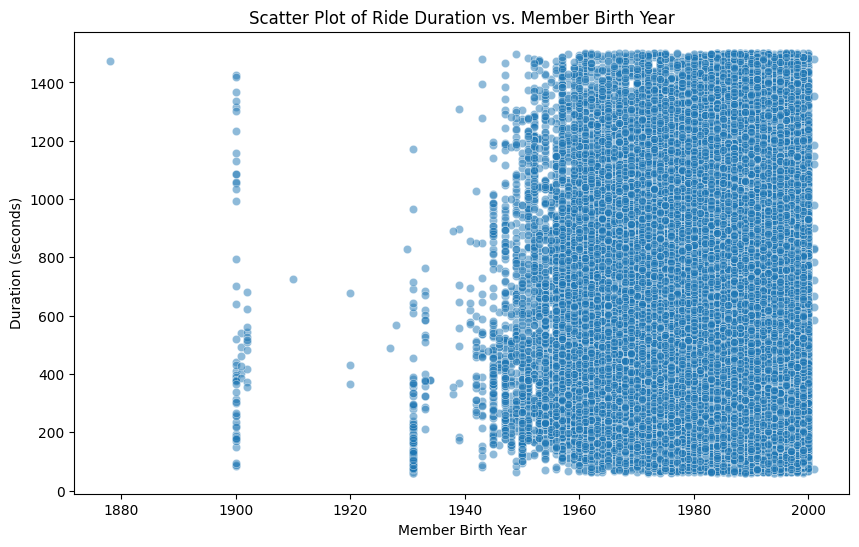

In [33]:
# Scatter Plot: Ride Duration vs. Member Birth Year
plot_scatter('member_birth_year', 'duration_sec', df1, 'Member Birth Year', 'Duration (seconds)', 
             'Scatter Plot of Ride Duration vs. Member Birth Year')

There is no clear linear relationship between ride duration and member birth year. Most ride durations are concentrated within a certain range across all member birth years.

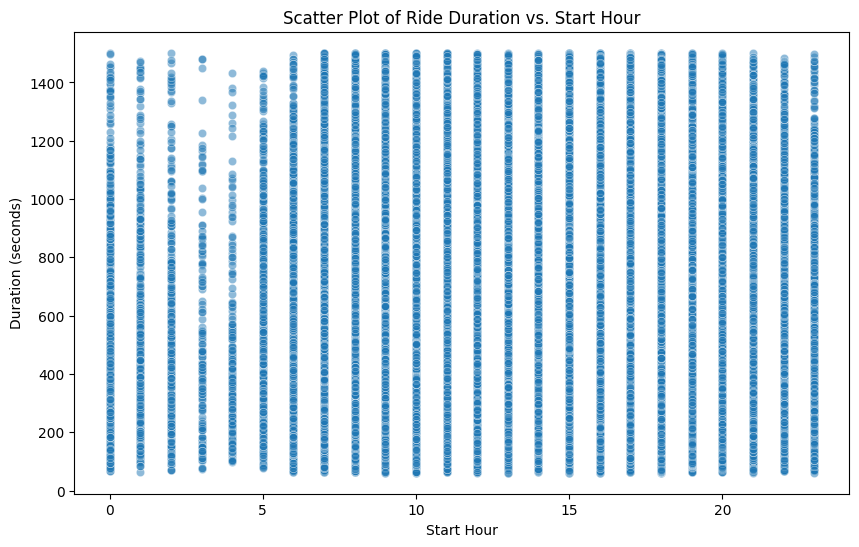

In [34]:
# Scatter Plot: Ride Duration vs. Start Hour
plot_scatter('start_hour', 'duration_sec', df1, 'Start Hour', 'Duration (seconds)', 
             'Scatter Plot of Ride Duration vs. Start Hour')

Ride durations vary across different start hours. Longer ride durations tend to occur during certain hours of the day, while shorter ride durations are more common during other hours.

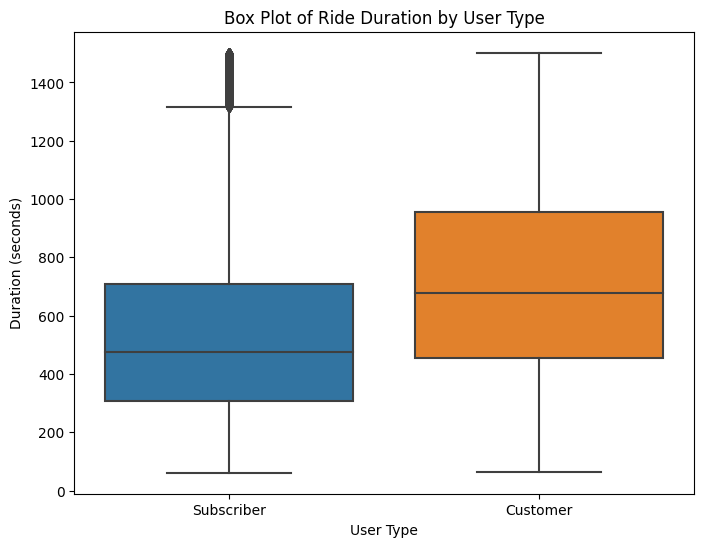

In [35]:
# Box Plot: Ride Duration by User Type
plot_box('user_type', 'duration_sec', df1, 'User Type', 'Duration (seconds)', 
         'Box Plot of Ride Duration by User Type')

There are differences in ride durations between different user types. Subscribers generally have shorter ride durations compared to customers, as indicated by the lower median and quartiles in the box plot.

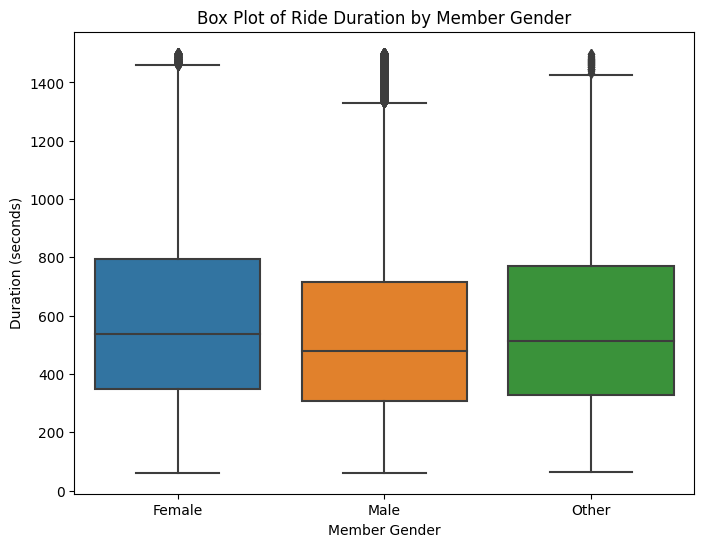

In [36]:
# Box Plot: Ride Duration by Member Gender
plot_box('member_gender', 'duration_sec', df1, 'Member Gender', 'Duration (seconds)', 
         'Box Plot of Ride Duration by Member Gender')

There are some differences in ride durations between different member genders.However, the differences are not as pronounced as those observed between user types.

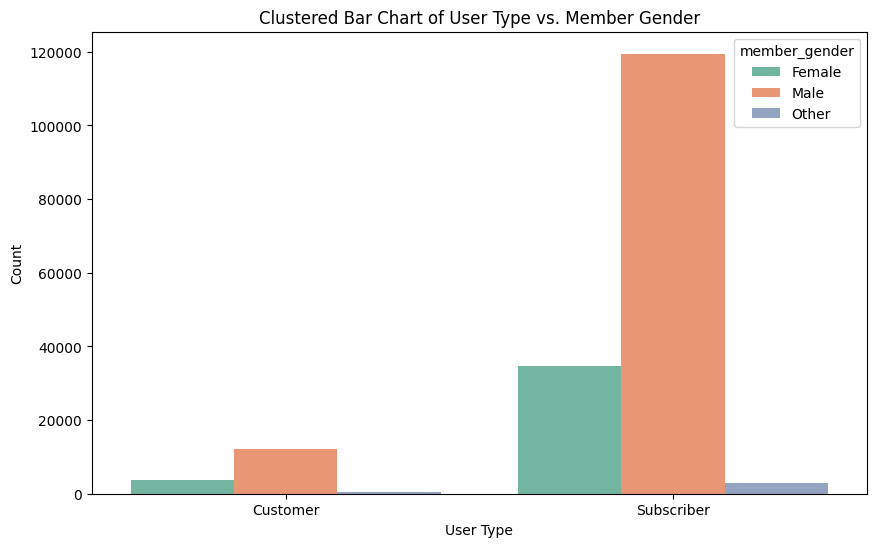

In [37]:
# Clustered Bar Chart: User Type vs. Member Gender
user_gender_counts = df1.groupby(['user_type', 'member_gender']).size().reset_index(name='count')
plot_clustered_bar('user_type', 'count', 'member_gender', user_gender_counts, 'User Type', 'Count', 
                   'Clustered Bar Chart of User Type vs. Member Gender')

The distribution of user types varies across different member genders.For both males and females, subscribers are more common compared to customers.The proportion of subscribers is higher among males compared to females.

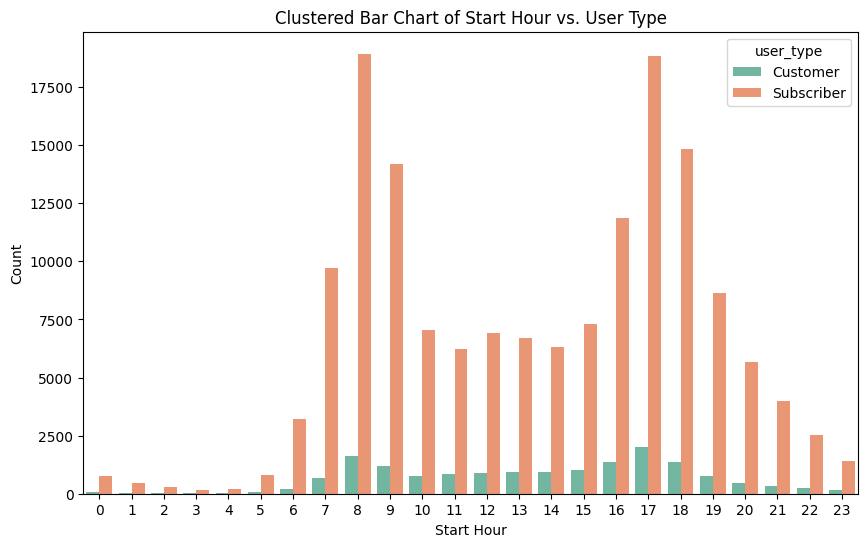

In [38]:
# Clustered Bar Chart: Start Hour vs. User Type
hour_user_counts = df1.groupby(['start_hour', 'user_type']).size().reset_index(name='count')
plot_clustered_bar('start_hour', 'count', 'user_type', hour_user_counts, 'Start Hour', 'Count', 
                   'Clustered Bar Chart of Start Hour vs. User Type')

The distribution of user types varies across different start hours. Subscribers dominate the number of rides during peak hours, suggesting that they might be using the bike-sharing service for commuting to work or other regular activities.
Customers, on the other hand, are more evenly distributed across different hours of the day.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The oberservation regarding variation fo main variable with other features in dataset is given below:

Start Hour and Ride Duration (Scatter Plot): The scatter plot of ride duration against start hour showed variations in ride durations throughout the day. While no clear linear relationship was observed, certain hours exhibited higher variability in ride durations compared to others. Notably, early morning and late evening hours showed increased variability, suggesting potential differences in ride patterns during these times.

Member Birth Year and Ride Duration (Scatter Plot): The scatter plot of ride duration against member birth year displayed a wide range of ride durations across different birth years. However, no significant trend or pattern was observed, indicating that member birth year may not be a strong predictor of ride duration.

User Type and Ride Duration (Box Plot): The box plot of ride duration by user type revealed that customers generally had longer ride durations compared to subscribers. This suggests that user type may influence ride duration, with casual users tending to take longer rides compared to regular subscribers.

Member Gender and Ride Duration (Box Plot): The box plot of ride duration by member gender showed slight variations in ride durations among different genders. However, the differences were not substantial, indicating that member gender may not be a significant factor influencing ride duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I also observed some interesting relationships between other features in the dataset:

Member Gender and User Type: The distribution of user types varies across different member genders.For both males and females, subscribers are more common compared to customers.The proportion of subscribers is higher among males compared to females.

Start Hour and User Type: The distribution of user types varies across different start hours. Subscribers dominate the number of rides during peak hours, suggesting that they might be using the bike-sharing service for commuting to work or other regular activities. Customers, on the other hand, are more evenly distributed across different hours of the day.

These observations provide insights into how these features interact with each other.

## Multivariate Exploration

Lets see some multivariate relationships for our dataset.

Duration vs. Start Hour vs. User Type (Facet Plot):

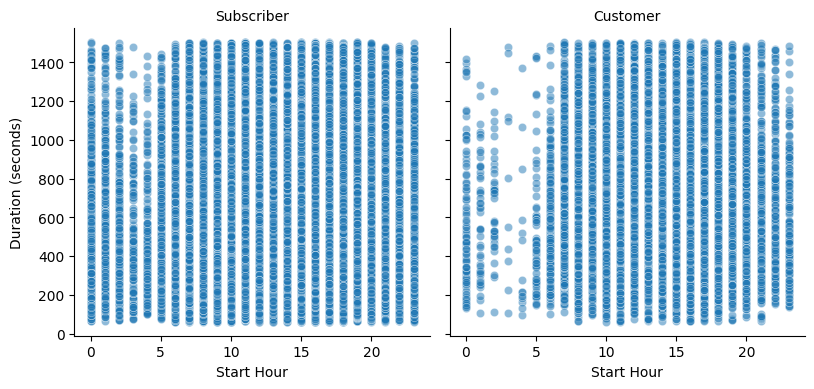

In [39]:
# Facet Grid plot of duration vs. start hour for each user type
g = sns.FacetGrid(data=df1, col='user_type', col_wrap=3, height=4)
g.map(sns.scatterplot, 'start_hour', 'duration_sec', alpha=0.5)
g.set_axis_labels('Start Hour', 'Duration (seconds)')
g.set_titles('{col_name}')
plt.show()

For both user types (Customer and Subscriber), there is a general trend of higher ride durations during certain hours of the day, particularly during peak commuting hours.
However, the distribution of ride durations varies between Customer and Subscriber. Customers tend to have longer ride durations compared to Subscribers, especially during off-peak hours.

Duration vs. Member Birth Year vs. Member Gender (Plot Matrix):

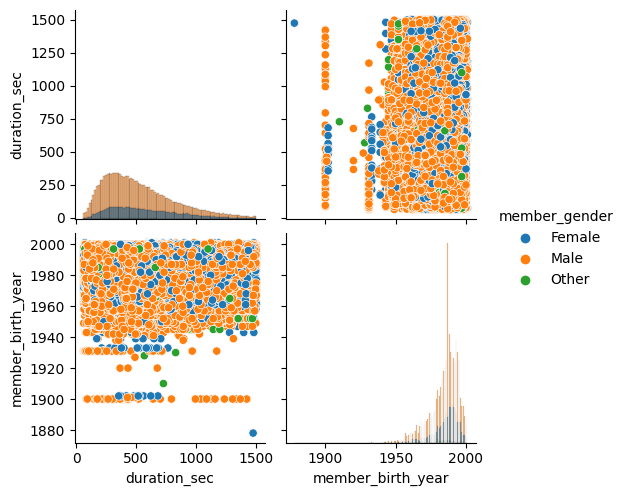

In [40]:
# Plot matrix of duration vs. member birth year vs. member gender
sns.pairplot(data=df1, vars=['duration_sec', 'member_birth_year'], hue='member_gender', diag_kind='hist')
plt.show()

There doesn't seem to be a strong correlation between ride duration and member birth year.
Across different member genders, the distribution of ride durations appears similar, with no clear pattern or trend based on birth year.

Duration vs. Start Hour vs. Member Gender (Scatter Plot with Color Encoding):

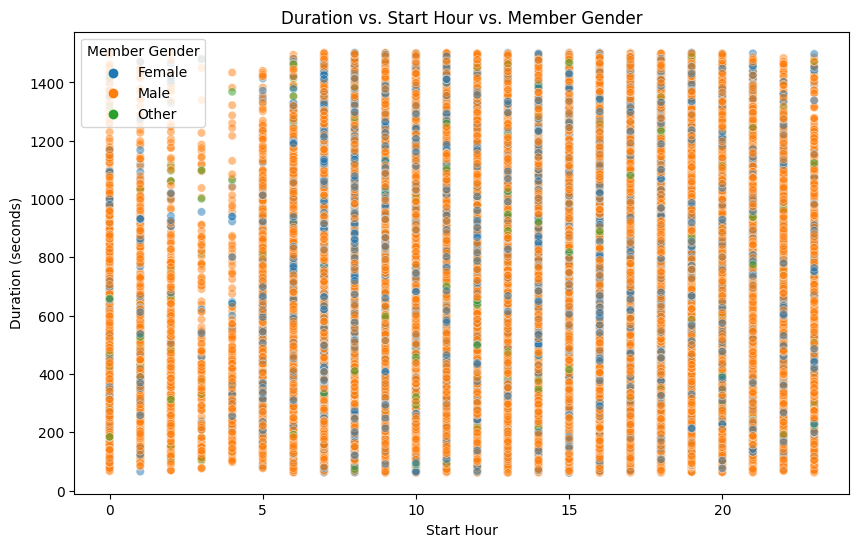

In [41]:
# Scatter plot of duration vs. start hour with color encoding for member gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='start_hour', y='duration_sec', hue='member_gender', alpha=0.5)
plt.xlabel('Start Hour')
plt.ylabel('Duration (seconds)')
plt.title('Duration vs. Start Hour vs. Member Gender')
plt.legend(title='Member Gender')
plt.show()

There is a variation in ride durations based on both start hour and member gender.
Generally, male and female members exhibit similar patterns in ride durations throughout the day, with peak durations during commuting hours.
The distribution of ride durations for 'Other' gender members is less clear, with some variability observed, especially during off-peak hours.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I observed several relationships in this part of investigation which are as follows:

The relationship between ride duration, start hour, and user type provided insights into how different user segments utilize the bike-sharing service throughout the day.It strengthened the understanding of peak hours for different user types, with Subscribers primarily using the service during commuting hours and Customers showing more varied usage patterns.

There wasn't a clear relationship observed between ride duration, member birth year, and member gender.
This suggests that factors other than age and gender might have a more significant influence on ride duration.

While there was variation in ride durations based on start hour and member gender, the relationship between these variables was not as pronounced.However, it did reinforce the understanding that ride durations tend to peak during specific hours of the day, regardless of member gender.

Overall, these relationships provided complementary perspectives on how ride duration interacts with other variables in the dataset. While some relationships were more evident than others, each contributed to a more comprehensive understanding of the factors influencing ride duration in the bike-sharing system.

### Were there any interesting or surprising interactions between features?

One interesting interaction observed was between ride duration, start hour, and user type. While it was expected that ride duration and start hour would have a relationship, the facet plot revealed how this relationship varies across different user types.

For instance, Subscribers showed a clear peak in ride duration during commuting hours, indicating that they primarily use the service for work-related trips. On the other hand, Customers exhibited more diverse ride duration patterns throughout the day. This interaction highlights how user type influences the temporal distribution of ride durations, providing insights into the differing needs and behaviors of bike-sharing users.

## Conclusions

The key findings from the data exploration are as follows:

- Our analysis of the distribution of ride durations shows that most rides are short, with a peak in frequency at the lower end of the duration scale. This indicates that short, quick rides are the most common usage of the bike-sharing systems.

- Subscribers make up the majority of users, suggesting that the bike-sharing service is commonly used by individuals with regular commuting needs. Customers, while fewer in number, exhibit more varied ride duration patterns, indicating potential leisure or one-time use.

- There are distinct time related patterns in ride durations based on the start hour of the trip. Subscribers tend to use the service primarily during commuting hours, leading to peaks in ride durations during those times. Customers, on the other hand, show more varied usage patterns throughout the day.

- While there are differences in ride durations between genders, the effect size is relatively small. Both males and females show similar patterns of ride durations, with slight variations.

- There is a wide range of birth years among users, with the majority falling between 1980 and 2000. Ride durations do not show a significant linear relationship with birth year, but there are some anomalies with very high durations among older users.

-  The distribution of rides across different start and end stations indicates varying levels of popularity among station locations. Some stations serve as significant hubs for bike-sharing activity, while others have lower usage.

- The interaction between ride duration, start hour, and user type reveals distinct usage patterns among different user segments. Subscribers tend to have more consistent ride durations during peak commuting hours, while Customers show more varied patterns throughout the day.

Overall, the exploration has provided valuable insights into bike-sharing usage patterns, highlighting the importance of considering user demographics, time factors, and station locations in understanding ride behaviors.

In [42]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Part_I_ford_bike_dataset.ipynb

[NbConvertApp] Converting notebook Part_I_ford_bike_dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 20 image(s).
[NbConvertApp] Writing 2735485 bytes to Part_I_ford_bike_dataset.html
